# <center> <i> EDA And Hypothesis Testing </i> </center>

 <i> Exploratory Data Analysis (EDA) and hypothesis testing are essential components of the data
science workflow, particularly in the field of network security. EDA helps uncover underlying
patterns, relationships, and potential anomalies in the dataset, while hypothesis testing enables
validating theories or assumptions statistically. These methodologies are pivotal in
understanding network behaviors and enhancing the accuracy of anomaly detection systems </i>

In [1037]:
%%capture
!pip install numpy pandas matplotlib
!pip install scikit-learn
!pip install  matplotlib seaborn
!pip install statsmodels

In [1038]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [1039]:
pd.set_option('display.max_columns', None)

In [1040]:
df=pd.read_csv("NAD.csv")
df.head()

duration protocoltype   service flag  srcbytes  dstbytes  land  \
0         0          tcp  ftp_data   SF       491         0     0   
1         0          udp     other   SF       146         0     0   
2         0          tcp   private   S0         0         0     0   
3         0          tcp      http   SF       232      8153     0   
4         0          tcp      http   SF       199       420     0   

   wrongfragment  urgent  hot  numfailedlogins  loggedin  numcompromised  \
0              0       0    0                0         0               0   
1              0       0    0                0         0               0   
2              0       0    0                0         0               0   
3              0       0    0                0         1               0   
4              0       0    0                0         1               0   

   rootshell  suattempted  numroot  numfilecreations  numshells  \
0          0            0        0                 0          0   
1          0            0        0                 0          0   
2          0            0        0                 0          0   
3          0            0        0                 0          0   
4          0            0        0                 0          0   

   numaccessfiles  numoutboundcmds  ishostlogin  isguestlogin  count  \
0               0                0            0             0      2   
1               0                0            0             0     13   
2               0                0            0             0    123   
3               0                0            0             0      5   
4               0                0            0             0     30   

   srvcount  serrorrate  srvserrorrate  rerrorrate  srvrerrorrate  \
0         2         0.0            0.0         0.0            0.0   
1         1         0.0            0.0         0.0            0.0   
2         6         1.0            1.0         0.0            0.0   
3         5         0.2            0.2         0.0            0.0   
4        32         0.0            0.0         0.0            0.0   

   samesrvrate  diffsrvrate  srvdiffhostrate  dsthostcount  dsthostsrvcount  \
0         1.00         0.00             0.00           150               25   
1         0.08         0.15             0.00           255                1   
2         0.05         0.07             0.00           255               26   
3         1.00         0.00             0.00            30              255   
4         1.00         0.00             0.09           255              255   

   dsthostsamesrvrate  dsthostdiffsrvrate  dsthostsamesrcportrate  \
0                0.17                0.03                    0.17   
1                0.00                0.60                    0.88   
2                0.10                0.05                    0.00   
3                1.00                0.00                    0.03   
4                1.00                0.00                    0.00   

   dsthostsrvdiffhostrate  dsthostserrorrate  dsthostsrvserrorrate  \
0                    0.00               0.00                  0.00   
1                    0.00               0.00                  0.00   
2                    0.00               1.00                  1.00   
3                    0.04               0.03                  0.01   
4                    0.00               0.00                  0.00   

   dsthostrerrorrate  dsthostsrvrerrorrate   attack  lastflag  
0               0.05                  0.00   normal        20  
1               0.00                  0.00   normal        15  
2               0.00                  0.00  neptune        19  
3               0.00                  0.01   normal        21  
4               0.00                  0.00   normal        21

In [1041]:
df.shape

(125973, 43)

In [1042]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [1043]:
df.describe()

duration      srcbytes      dstbytes           land  wrongfragment  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198       0.022687   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086       0.253530   
min         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000       3.000000   

              urgent            hot  numfailedlogins       loggedin  \
count  125973.000000  125973.000000    125973.000000  125973.000000   
mean        0.000111       0.204409         0.001222       0.395736   
std         0.014366       2.149968         0.045239       0.489010   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.000000         0.000000       0.000000   
50%         0.000000       0.000000         0.000000       0.000000   
75%         0.000000       0.000000         0.000000       1.000000   
max         3.000000      77.000000         5.000000       1.000000   

       numcompromised      rootshell    suattempted        numroot  \
count   125973.000000  125973.000000  125973.000000  125973.000000   
mean         0.279250       0.001342       0.001103       0.302192   
std         23.942042       0.036603       0.045154      24.399618   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max       7479.000000       1.000000       2.000000    7468.000000   

       numfilecreations      numshells  numaccessfiles  numoutboundcmds  \
count     125973.000000  125973.000000   125973.000000         125973.0   
mean           0.012669       0.000413        0.004096              0.0   
std            0.483935       0.022181        0.099370              0.0   
min            0.000000       0.000000        0.000000              0.0   
25%            0.000000       0.000000        0.000000              0.0   
50%            0.000000       0.000000        0.000000              0.0   
75%            0.000000       0.000000        0.000000              0.0   
max           43.000000       2.000000        9.000000              0.0   

         ishostlogin   isguestlogin          count       srvcount  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.000008       0.009423      84.107555      27.737888   
std         0.002817       0.096612     114.508607      72.635840   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       2.000000       2.000000   
50%         0.000000       0.000000      14.000000       8.000000   
75%         0.000000       0.000000     143.000000      18.000000   
max         1.000000       1.000000     511.000000     511.000000   

          serrorrate  srvserrorrate     rerrorrate  srvrerrorrate  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.284485       0.282485       0.119958       0.121183   
std         0.446456       0.447022       0.320436       0.323647   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         samesrvrate    diffsrvrate  srvdiffhostrate   dsthostcount  \
count  125973.00000

In [1044]:
df.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate   

In [1045]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

### <i> Understanding each feature : </i>

In [1046]:
df['protocoltype'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [1047]:
df['protocoltype'].value_counts()

protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [1048]:
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [1049]:
df['service'].nunique()

70

In [1050]:
df['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [1051]:
df['flag'].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [1052]:
df['srcbytes'].mean() 

np.float64(45566.74300048423)

In [1053]:
df['srcbytes'].max() 

np.int64(1379963888)

In [1054]:
df['srcbytes'].min() 

np.int64(0)

In [1055]:
df['dstbytes'].mean() 

np.float64(19779.114421344257)

In [1056]:
df['dstbytes'].max()

np.int64(1309937401)

In [1057]:
df['dstbytes'].min()

np.int64(0)

In [1058]:
df['land'].value_counts()

land
0    125948
1        25
Name: count, dtype: int64

In [1059]:
df['wrongfragment'].value_counts() 

wrongfragment
0    124883
3       884
1       206
Name: count, dtype: int64

In [1060]:
df['urgent'].value_counts()

urgent
0    125964
1         5
2         3
3         1
Name: count, dtype: int64

In [1061]:
df['hot'].value_counts()

hot
0     123302
2       1037
1        369
28       277
30       256
4        173
6        140
5         76
24        68
19        57
22        55
3         54
18        45
14        30
20         9
7          5
15         4
11         3
9          2
25         2
44         2
17         1
77         1
12         1
10         1
8          1
21         1
33         1
Name: count, dtype: int64

In [1062]:
df['numfailedlogins'].value_counts()

numfailedlogins
0    125851
1       104
2         9
3         5
4         3
5         1
Name: count, dtype: int64

In [1063]:
df['loggedin'].value_counts()

loggedin
0    76121
1    49852
Name: count, dtype: int64

In [1064]:
df['numcompromised'].unique()

array([   0,    3,    2,    1,   19,    5,    4,   38,  107,  462,  110,
          6,  151,    7,   31,    9,  157,   13,  558,   12,  371,  217,
         83,  193,  789,  520,  884,  457,  767,  756,   21,   10,  281,
         23,   44,  622,   18,   15,  716,  202,  121,  682,  537,  345,
         17,    8,  166, 7479,  307,   40,  405,  751,   54,  761,  102,
        237,  456,   22,  809,  198,   37,   75,  378,   16, 1739,  174,
         46,   74,  543,  691,   94,  676,  175,  373,   14,   78, 1043,
        177,  247,  538,  187,  407,  258,  568,  349,  452,  375,   11])

In [1065]:
df['numcompromised'].value_counts()

numcompromised
0      124687
1         976
2          98
4          40
3          38
        ...  
568         1
349         1
452         1
375         1
11          1
Name: count, Length: 88, dtype: int64

In [1066]:
df['rootshell'].value_counts()

rootshell
0    125804
1       169
Name: count, dtype: int64

In [1067]:
df['suattempted'].value_counts()

suattempted
0    125893
2        59
1        21
Name: count, dtype: int64

In [1068]:
df['numroot'].value_counts()

numroot
0      125324
1         273
9         121
6          99
2          33
        ...  
287         1
626         1
387         1
505         1
425         1
Name: count, Length: 82, dtype: int64

In [1069]:
df['numroot'].unique()

array([   0,    9,   10,    1,    5,    2,    6,   54,   14,  100,  512,
        121,  151,   38,    3,  179,    7,  629,  417,  146,  247,   91,
        191,  867,  572,    4,  975,  508,  857,   12,  278,   47,  684,
        789,  222,  123,  749,  611,  390,  184,  416, 7468,  338,   40,
        450,  841,   39,  993,  849,    8,  119,  261,  502,  889,  218,
         36,   74,  421,   16, 1743,  204,   55,   77,  610,  766,  104,
        754,   17,  206,   22,   71, 1045,  190,  402,  605,  187,  446,
        287,  626,  387,  505,  425])

In [1070]:
df['numfilecreations'].value_counts()

numfilecreations
0     125686
1        151
2         41
4         13
8          5
15         5
5          5
17         5
3          5
10         5
11         4
12         4
7          4
18         4
40         3
25         3
14         3
20         3
6          3
26         3
9          2
23         2
13         2
21         1
29         1
19         1
27         1
28         1
16         1
38         1
33         1
22         1
43         1
36         1
34         1
Name: count, dtype: int64

In [1071]:
df['numshells'].value_counts()

numshells
0    125926
1        42
2         5
Name: count, dtype: int64

In [1072]:
df['numaccessfiles'].value_counts()

numaccessfiles
0    125602
1       313
2        29
3         8
5         6
4         5
6         4
8         3
7         2
9         1
Name: count, dtype: int64

In [1073]:
df['numoutboundcmds'].value_counts()

numoutboundcmds
0    125973
Name: count, dtype: int64

In [1074]:
df.drop('numoutboundcmds', axis=1, inplace=True)

In [1075]:
df['ishostlogin'].value_counts()

ishostlogin
0    125972
1         1
Name: count, dtype: int64

In [1076]:
df.drop('ishostlogin', axis=1, inplace=True)

In [1077]:
df['isguestlogin'].value_counts()

isguestlogin
0    124786
1      1187
Name: count, dtype: int64

In [1078]:
df['count'].unique()

array([  2,  13, 123,   5,  30, 121, 166, 117, 270, 133, 205, 199,   3,
       233,  96,   8,   1,   9, 223, 280, 248, 279,  14,  33,  57, 181,
       122,  22, 228,  50, 262,   4,  11, 108,  80,  44, 258,  10,  61,
        26, 120,  73, 135,  24, 148, 206, 175,  63,  52, 125, 168, 145,
       138, 276, 220, 212, 250, 132, 109, 146, 300, 129,  32,  82,  15,
        21, 110,   6,   7, 246, 272, 259, 294,  79, 190, 245, 263,  87,
       292, 295, 143, 278, 102, 251, 222, 260, 511, 287, 486, 286,  35,
        28, 101,  12,  19, 406,  17, 201, 124, 162, 277, 274, 141, 103,
       171, 238, 281, 163, 301,  16,  46,  39, 211, 256, 144, 104,  18,
        74, 225,  66, 139, 241, 213,  36, 254, 179, 195,  20, 208, 268,
       425,  42, 196, 111, 237, 257,  77, 137, 290, 203, 116, 457,  47,
        71, 200, 140,  68, 215, 115, 275,  76, 202, 252, 197, 198, 154,
       204,  25, 459, 253, 142, 167,  43, 221, 224, 284, 150, 255, 235,
       131, 100,  34, 151, 130, 236,  84, 265, 210,  54,  23, 12

In [1079]:
df['srvserrorrate'].value_counts()

srvserrorrate
0.00    88754
1.00    34874
0.50      432
0.33      273
0.25      233
        ...  
0.70        1
0.82        1
0.61        1
0.51        1
0.28        1
Name: count, Length: 86, dtype: int64

### <i>Visualizing each feature : </i>

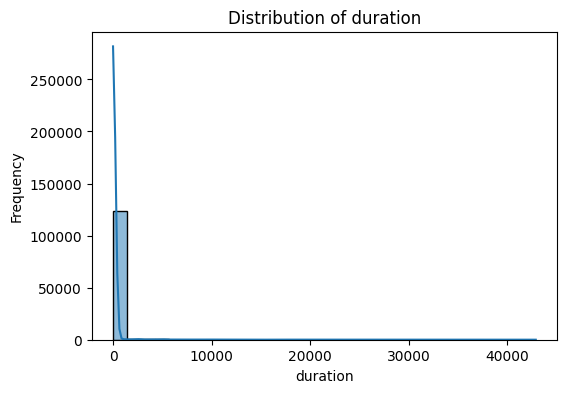

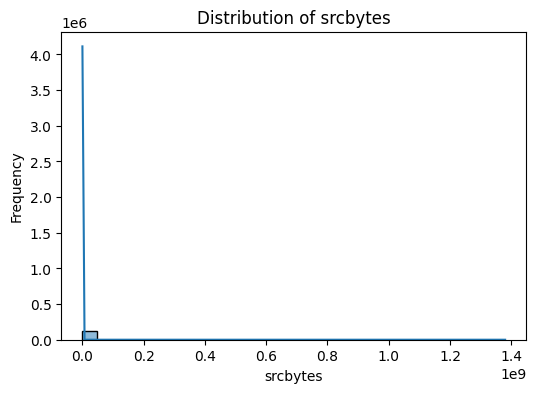

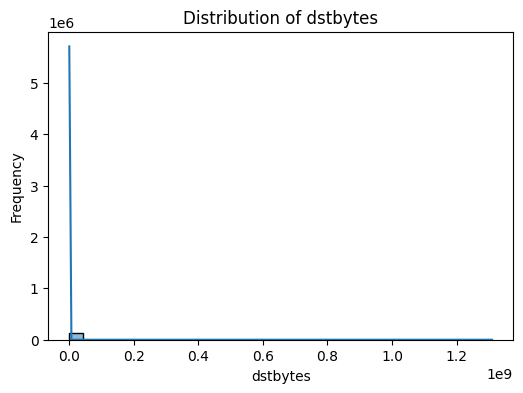

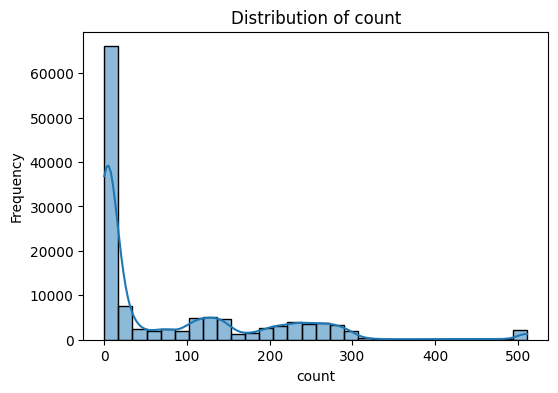

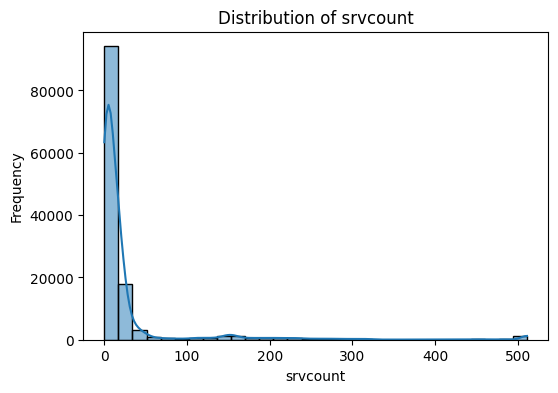

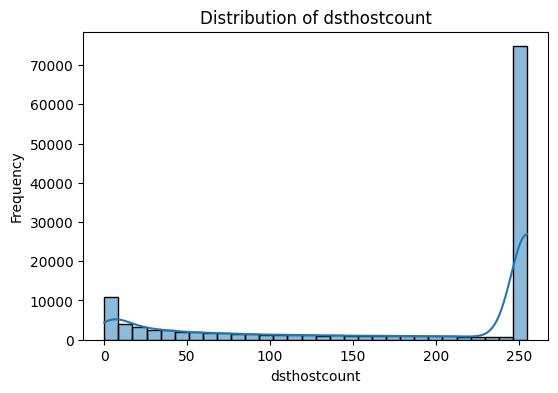

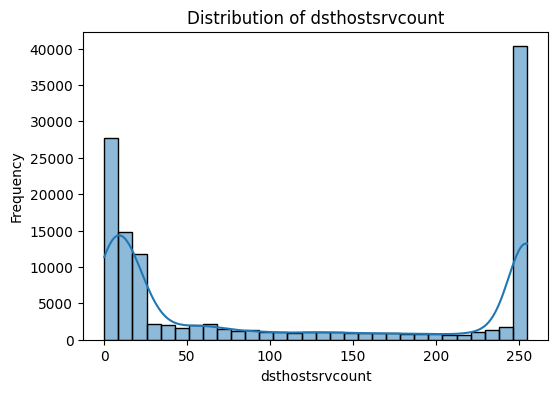

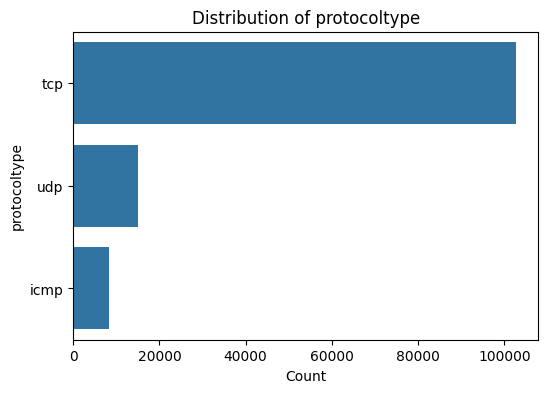

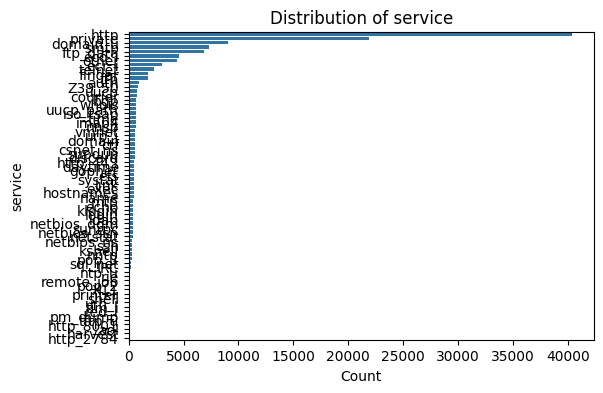

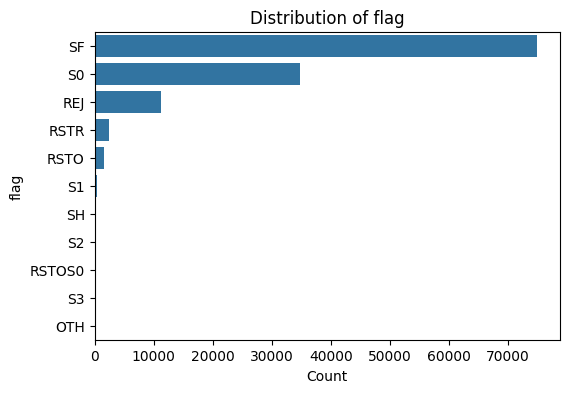

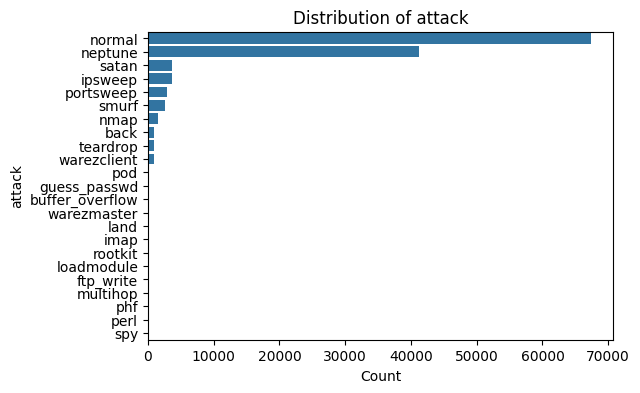

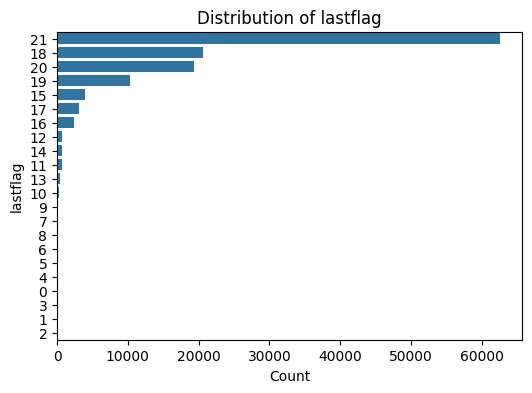

In [1080]:
# Selecting important features for distribution analysis
important_features = ['duration','srcbytes','dstbytes','protocoltype', 'service','flag', 
                      'count','srvcount','dsthostcount','dsthostsrvcount']
# Ploting histograms for numerical features
numerical_features = ['duration','srcbytes','dstbytes','count','srvcount','dsthostcount',
                      'dsthostsrvcount']
for feature in numerical_features:
    plt.figure(figsize = (6,4))
    sns.histplot(df[feature], kde = True, bins =30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
# Ploting bar charts for categorical features
categorical_features =['protocoltype','service','flag','attack','lastflag']
for feature in categorical_features:
    plt.figure(figsize =(6,4))
    sns.countplot(y =df[feature], order = df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

### <i> Correlation Analysis: </i>

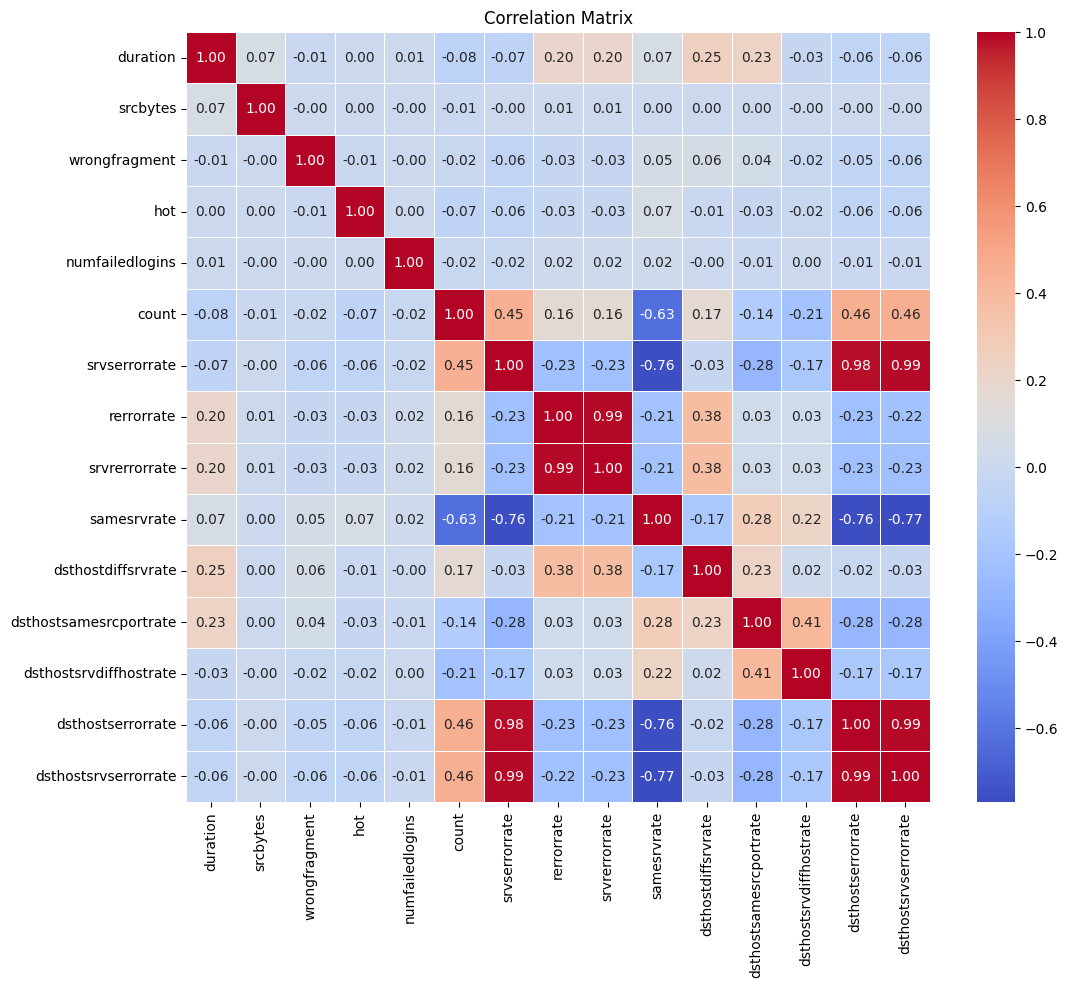

In [1081]:
selected_features=['duration','srcbytes','wrongfragment','hot','numfailedlogins',
        'count','srvserrorrate','rerrorrate','srvrerrorrate','samesrvrate','dsthostdiffsrvrate',
        'dsthostsamesrcportrate','dsthostsrvdiffhostrate','dsthostserrorrate','dsthostsrvserrorrate']
df_selected=df[selected_features]
# Calculating  the correlation matrix
correlation_matrix = df_selected.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### <i> Implication </i>
<i> Error Rates:
High correlations between srvserrorrate, dsthostserrorrate, and dsthostsrvserrorrate indicate that error rates tend to increase together, suggesting that anomalies are consistent across different error metrics.

<i>Connection Frequency: 
A negative correlation between count and samesrvrate suggests that more frequent connections are less likely to connect to the same server.

<i>Duration: 
Longer connection durations correlate with higher rates of different destination hosts and same source ports, indicating more diverse interactions in longer sessions.
</i>

### <i> Outlier Detection: </i>

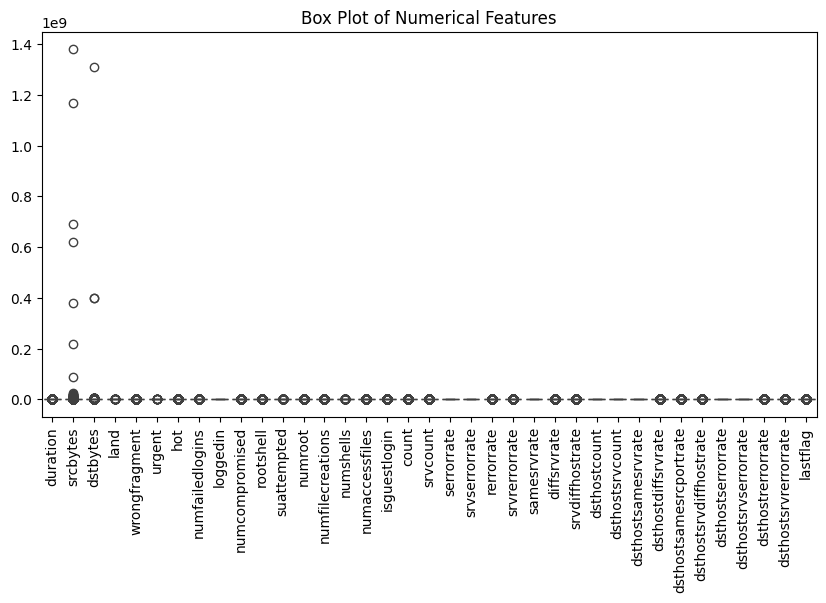

In [1082]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.select_dtypes(include=['number']))  # Plot box plots only for numerical columns
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title('Box Plot of Numerical Features')
plt.show()

In [1083]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Step 1: Z-Score Method
# Calculating Z-Scores for each column
z_scores = stats.zscore(numeric_df)
z_scores_df = pd.DataFrame(z_scores, columns=numeric_df.columns)
z_threshold = 3.5
# Identifying outliers based on Z-scores
z_outliers = (z_scores_df.abs() > z_threshold)
z_outlier_indices = z_outliers[z_outliers.any(axis=1)].index
# Step 2: IQR Method
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
iqr_threshold = 1.5 
iqr_outliers = ((numeric_df < (Q1 - iqr_threshold * IQR)) | (numeric_df > (Q3 + iqr_threshold * IQR)))
iqr_outlier_indices = iqr_outliers[iqr_outliers.any(axis=1)].index
# Finding common outliers
common_outlier_indices = z_outlier_indices.intersection(iqr_outlier_indices)
# Printing the size of common outliers and original data
print("Common outliers size identified by both methods and original data size :")
print(common_outlier_indices.shape, df.shape)
# Dropping the common outliers from the DataFrame
df_cleaned = df.drop(index=common_outlier_indices, errors='ignore')

df_cleaned.reset_index(drop=True, inplace=True)
# Verifying the size after dropping outliers
print("Data size after dropping outliers: ")
print(df_cleaned.shape)

Common outliers size identified by both methods and original data size :
(16569,) (125973, 41)
Data size after dropping outliers: 
(109404, 41)


<i> There are 16569 rows of data as Outliers. </i>

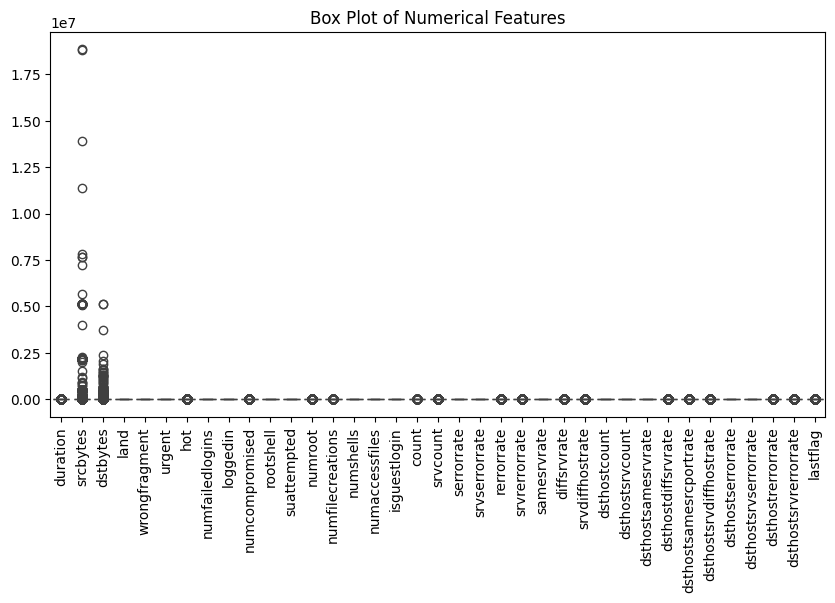

In [1084]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned.select_dtypes(include=['number']))  
plt.xticks(rotation=90)  
plt.title('Box Plot of Numerical Features')
plt.show()

In [1085]:
df=df_cleaned

In [1086]:
df.shape

(109404, 41)

### <i> Feature Engineering </i>

In [1087]:
df['total_bytes'] = df['srcbytes'] + df['dstbytes']
df['byte_ratio'] = df['srcbytes'] / (df['dstbytes'] + 1)

<i> This code creates two new features in the DataFrame df:

<i>total_bytes:  Sum of srcbytes and dstbytes.

<i> byte_ratio:  Ratio of srcbytes to dstbytes (with 1 added to avoid division by zero). 

In [1088]:
df.drop(columns=['srcbytes', 'dstbytes'], inplace=True)

In [1089]:
df['wrongfragment'].value_counts()

wrongfragment
0    109404
Name: count, dtype: int64

In [1090]:
df.drop(columns=['wrongfragment'], inplace=True)

In [1091]:
df.shape

(109404, 40)

In [1092]:
df['urgent'].value_counts()
df.drop(columns=['urgent'], inplace=True)

<i> The below code creates two new features in the DataFrame df:

<i>combined_serror_rerror_rate: Average of serrorrate and rerrorrate.

<i>combined_srv_serror_rerror_rate: Average of srvserrorrate and srvrerrorrate.

In [1093]:
df['combined_serror_rerror_rate'] = (df['serrorrate'] + df['rerrorrate'] ) / 2
df['combined_srv_serror_rerror_rate'] = (df['srvserrorrate'] + df['srvrerrorrate'] ) / 2

<i> 
The below code creates a new feature in the DataFrame df:

ratio_samesrvrate_diffsrvrate: Ratio of samesrvrate to diffsrvrate, with a small value 
added to avoid division by zero.

In [1094]:
df['ratio_samesrvrate_diffsrvrate'] = df['samesrvrate'] / (df['diffsrvrate'] + 1e-6)


<i>The below code creates a new feature in the DataFrame df:

<i>service_host_distribution_ratio: Ratio of samesrvrate to srvdiffhostrate, with a small value 
  added to avoid division by zero.

In [1095]:
df['service_host_distribution_ratio'] = df['samesrvrate'] / (df['srvdiffhostrate'] + 1e-6)

<i>
The below creates a new feature in the DataFrame df:

<i>combined_dsthostserrorrate_dsthostrerrorrate: Sum of dsthostserrorrate and dsthostrerrorrate, with a small value 
  added to dsthostrerrorrate to avoid potential issues with zero values.

In [1096]:
df['combined_dsthostserrorrate_dsthostrerrorrate'] = df['dsthostserrorrate'] + (df['dsthostrerrorrate'] + 1e-6) 

<i> 
The below code creates a new feature that combines dsthostsrvserrorrate and dsthostsrvrerrorrate, adding a small constant to prevent division by zero.

In [1097]:
df['combined_dsthostsrvserrorrate_dsthostsrvrerrorrate'] = df['dsthostsrvserrorrate'] +  (df['dsthostsrvrerrorrate'] + 1e-6) 

In [1098]:
 df.drop(columns=['serrorrate','rerrorrate','srvserrorrate','srvrerrorrate',
                    'samesrvrate','diffsrvrate','srvdiffhostrate','dsthostserrorrate',
                  'dsthostrerrorrate','dsthostsrvserrorrate','dsthostsrvrerrorrate'],inplace=True)

### <i> Hypothesis Testing: </i>

In [1099]:
normal_connections = df[df['attack'] == 'normal'] 
anomalous_connections = df[df['attack'] != 'normal']  

### Hypothesis:
Null Hypothesis (H0): There is no significant difference in the mean of total_bytes between normal and anomalous connections.
Alternative Hypothesis (H1): There is a significant difference in the mean of total_bytes between normal and anomalous connections.

In [1100]:
# Performing t-test
t_stat, p_value = stats.ttest_ind(normal_connections['total_bytes'], anomalous_connections['total_bytes'])
alpha = 0.05
print(f"p-value = {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in total_bytes between normal and anomalous connections.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in total_bytes between normal and anomalous connections.")

p-value = 7.630709530487128e-14
Reject the null hypothesis: There is a significant difference in total_bytes between normal and anomalous connections.


### Implications:

Traffic Volume Differentiation:
The data shows that connections with anomalous behavior have a significantly different total_bytes compared to normal connections. This suggests that total_bytes is a good indicator of whether a connection is normal or anomalous.

Anomaly Detection:
This finding supports the idea that traffic volume (measured in total_bytes) can be used as a feature to detect anomalies. Connections with unusually high or low total_bytes are more likely to be anomalous.
In summary, differences in total_bytes are a strong indicator of connection anomalies, which can be leveraged for better detection and analysis in network security.








### Hypothesis:
Null Hypothesis (H0):
There is no association between the protocoltype and the type of connection (normal vs. anomalous). In other words, the distribution of protocoltype is the same across normal and anomalous connections.

Alternative Hypothesis (H1):
There is an association between the protocoltype and the type of connection (normal vs. anomalous). This means that the distribution of protocoltype differs between normal and anomalous connections.


In [1101]:
# Creating  contingency table
contingency_table = pd.crosstab(df['protocoltype'], df['attack'])
# Performing  Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of Protocol_type differs significantly between normal and anomalous connections.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of Protocol_type between normal and anomalous connections.")

Chi2 Statistic: 84968.87970274723
P-value: 0.0
Reject the null hypothesis: The distribution of Protocol_type differs significantly between normal and anomalous connections.


 ### Implications:

Protocol Type and Anomalies:
The significant result suggests that the type of protocol used is associated with whether a connection is normal or anomalous. In other words, certain protocoltype values are more frequently associated with anomalies (attacks) compared to normal connections.
This implies that specific protocols might be more prone to attacks or may exhibit different behavior when an attack is occurring.



### Hypothesis:

Null Hypothesis (H₀): The distribution of network services (service column) is the same for normal and anomalous connections. There is no significant difference in the frequency of services between normal and anomalous connections.

Alternative Hypothesis (H₁): The distribution of network services (service column) differs between normal and anomalous connections. There is a significant difference in the frequency of services between normal and anomalous connections.

In [1102]:
# Creating a contingency table
contingency_table=pd.crosstab(df['service'], df['attack'])
# Performing Chi-square test
chi2_stat, p_value, dof, expected=chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of services differs significantly between normal and anomalous connections.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of services between normal and anomalous connections.")

Chi-square Statistic: 266327.7267503316
P-value: 0.0
Reject the null hypothesis: The distribution of services differs significantly between normal and anomalous connections.


### Implication:

Certain services are more frequently targeted by anomalies. This suggests that specific services are more prone to network security issues, and focusing on these services could help in identifying and mitigating potential threats more effectively.

### Hypothesis:

Null Hypothesis (H0): Error flags in the Flag feature have no significant impact on the likelihood of network anomalies.

Alternative Hypothesis (H1): Error flags in the Flag feature have a significant impact on the likelihood of network anomalies.

In [1103]:
# Converting 'Flag' to numeric values using LabelEncoder
label_encoder=LabelEncoder()
df['Flag_encoded']=label_encoder.fit_transform(df['flag'])
# Creating binary target variable
df['anomaly']=df['attack'].apply(lambda x:1 if x != 'normal' else 0)
X=df[['Flag_encoded']]
y=df['anomaly']
# Spliting the data into training and testing .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fiting the logistic regression 
log_reg =LogisticRegression()
log_reg.fit(X_train, y_train)
# Predicting probabilities 
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
# Logistic regression with statsmodels for detailed output
X_with_const = sm.add_constant(X)  # Adding constant for the intercept
model = sm.Logit(y, X_with_const)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.349574
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                anomaly   No. Observations:               109404
Model:                          Logit   Df Residuals:                   109402
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  0.4877
Time:                        21:38:55   Log-Likelihood:                -38245.
converged:                       True   LL-Null:                       -74648.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2018      0.034    179.951      0.000       6.134       6.269
Flag_encoded    -0.9256      0.005   -199.271      0.000      -0.935      -0.916
================================================================================
"""

The logistic regression model assesses the relationship between the Flag_encoded feature and the likelihood of an anomaly. Here's a detailed interpretation of the results:

Log-Likelihood:
Log-Likelihood: -38245. This value indicates the goodness of fit of the model; the higher (or less negative) the log-likelihood, the better the fit.
LL-Null: -74648. This value is the log-likelihood of a model with no predictors, only an intercept.

Pseudo R-squared: 0.4877
This value provides an indication of how much variation in the dependent variable is explained by the model. A Pseudo R-squared of 0.4877 means that approximately 48.77% of the variance in the outcome (anomaly) is explained by the model.

Coefficients:
const (Intercept): 6.2018. This is the log-odds of the outcome when Flag_encoded is zero.
Flag_encoded: -0.9256. This coefficient indicates that for a one-unit increase in Flag_encoded, the log-odds of an anomaly decrease by 0.9256.

Statistical Significance:
The p-value for both the intercept and Flag_encoded is 0.000, indicating that both are statistically significant at conventional levels (e.g., 0.05).

Confidence Intervals:
The 95% confidence interval for the Flag_encoded coefficient is [-0.935, -0.916], meaning we can be 95% confident that the true coefficient lies within this range.


### Implication

The results suggest that error flags in the Flag feature are significantly associated with anomalies. Specifically, as the Flag_encoded value increases, the likelihood of an anomaly decreases significantly. This indicates that certain flag statuses are strongly predictive of whether a connection is anomalous or not.